In [5]:
import pandas as pd
import numpy as np
import re

from torch import nn
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import *
import torchvision.models as models


import torch.nn as nn
from transformers import BertModel, BertTokenizer
import torch.nn as nn
import torch.nn.functional as F
from sentence_transformers import SentenceTransformer, util
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from torch.nn import Transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# import pre-processed data
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import keras_toolkit as kt
import keras.backend as K
from sklearn.model_selection import train_test_split
from textwrap import wrap

2023-04-16 13:52:17.221041: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 13:52:22.348070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
training_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/train.csv')
val_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/val.csv')
testing_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/test.csv')

In [7]:
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)
img_model = tf.keras.applications.ResNet50(input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top = False, weights = 'imagenet' )

94765736/94765736 [==============================] - 0s 0us/step


In [8]:
def get_imageEmbeddings(model,imagePath):
    image = tf.keras.preprocessing.image.load_img(imagePath,target_size= size)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    img_embeddings = model(input_arr)
    meanImgEmb1 = np.mean(img_embeddings,axis =0)
    meanImgEmb2 = np.mean(meanImgEmb1,axis=0)
    meanImgEmb = np.mean(meanImgEmb2,axis=0)
    return meanImgEmb

In [9]:
image_embeddings={}
for index,row in  training_dataset.iterrows():
    imagePath = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    image_embeddings[row[0]] = img_emb

val_image_embeddings={}
for index,row in  val_dataset.iterrows():
    imagePath = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    val_image_embeddings[row[0]] = img_emb

test_image_embeddings={}
for index,row in  testing_dataset.iterrows():
    imagePath = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    test_image_embeddings[row[0]] = img_emb

In [22]:
image_embeddings

{'train_2249428809': array([0.9575496 , 0.7182376 , 1.3839195 , ..., 0.16069031, 1.8516228 ,
        0.        ], dtype=float32),
 'train_1453612941': array([0.43119392, 0.3266752 , 0.07947792, ..., 0.2970516 , 0.0571693 ,
        0.1977201 ], dtype=float32),
 'train_414717665': array([0.5756456, 1.6015905, 0.2813149, ..., 0.4796488, 1.1206422,
        3.6835744], dtype=float32),
 'train_404098311': array([0.48483285, 8.176398  , 0.2959595 , ..., 0.11636493, 0.40828127,
        3.393978  ], dtype=float32),
 'train_653040440': array([0.09757696, 0.12635607, 0.00491908, ..., 0.26313052, 0.24239123,
        2.2034745 ], dtype=float32),
 'train_1523239598': array([0.5272729 , 2.8971543 , 0.34341332, ..., 0.        , 0.10741109,
        0.33562642], dtype=float32),
 'train_1030616675': array([0.        , 0.26668474, 0.00079373, ..., 0.09062093, 0.        ,
        0.6650079 ], dtype=float32),
 'train_4273486050': array([0.91980606, 6.1352577 , 0.        , ..., 0.        , 0.12702861,
      

In [28]:
list(X_train.values())

[array([0.9575496 , 0.7182376 , 1.3839195 , ..., 0.16069031, 1.8516228 ,
        0.        ], dtype=float32),
 array([0.43119392, 0.3266752 , 0.07947792, ..., 0.2970516 , 0.0571693 ,
        0.1977201 ], dtype=float32),
 array([0.5756456, 1.6015905, 0.2813149, ..., 0.4796488, 1.1206422,
        3.6835744], dtype=float32),
 array([0.48483285, 8.176398  , 0.2959595 , ..., 0.11636493, 0.40828127,
        3.393978  ], dtype=float32),
 array([0.09757696, 0.12635607, 0.00491908, ..., 0.26313052, 0.24239123,
        2.2034745 ], dtype=float32),
 array([0.5272729 , 2.8971543 , 0.34341332, ..., 0.        , 0.10741109,
        0.33562642], dtype=float32),
 array([0.        , 0.26668474, 0.00079373, ..., 0.09062093, 0.        ,
        0.6650079 ], dtype=float32),
 array([0.91980606, 6.1352577 , 0.        , ..., 0.        , 0.12702861,
        1.339724  ], dtype=float32),
 array([0.14015058, 0.        , 0.03338008, ..., 0.        , 0.05788312,
        0.05932008], dtype=float32),
 array([7.077511

Text(0, 0.5, 'Score')

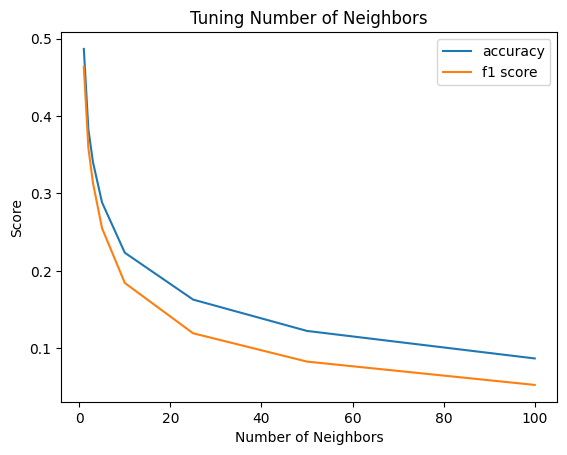

In [29]:
acc_dict = {}
f1_dict = {}
X_train, X_val, y_train, y_val = image_embeddings, val_image_embeddings, training_dataset.label_group, val_dataset.label_group

# X_train_rs = np.array(X_train.values()).reshape(-1, 1)
# X_val_rs = np.array(X_val.values()).reshape(-1, 1)
# y_train_rs = np.array(y_train.values()).reshape(-1, 1)

from sklearn.metrics import accuracy_score, f1_score
for k in [1, 2, 3, 5, 10, 25, 50, 100]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(list(X_train.values()), y_train)
    y_pred = knn.predict(list(X_val.values()))

    # Evaluate the performance on the test set
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    acc_dict[k] = accuracy
    f1_dict[k] = f1

plt.plot(acc_dict.keys(), acc_dict.values(), label='accuracy')
plt.plot(f1_dict.keys(), f1_dict.values(), label='f1 score')
plt.legend()
plt.title('Tuning Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')


In [31]:
X_test, y_test = test_image_embeddings, testing_dataset.label_group

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(list(X_train.values()), y_train)
y_pred = knn.predict(list(X_test.values()))
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy = {accuracy}')
print(f'F1 score = {f1}')

Accuracy = 0.37416058394160584
F1 score = 0.34650835993055373
